<a href="https://colab.research.google.com/github/jyj0607040607/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공신경망을 구성하는 절차


1.   더미데이터 준비
2.   훈련용, 검증용, 테스트용으로 나눈다.
3.   심층을 만든다(dense)
4.   model에 적용
5.   컴파일 진행 (최적화기법을 적용 : adam)
6.   fit(훈련)
7.   evaluate(검증)


손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인 할수 있다.

*  에포크 횟수, 손실, 정확도
*  아래쪽에 <keras.src.callbacks.history.History at 0x79d5e6862890> 이 출력 메시지가 나온다.
*  코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력된다.

다시말해 pit() 메서드는 History라는 클래스 객체를 반환한다.
*  훈련과정의 지표, 손실, 정확도등 내장

이 값을 잘 활용하면 그래프를 그릴 수 있다.

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
      keras.datasets.fashion_mnist.load_data()
# 인터효과 제거용 \ -> 한줄로 긴 문장을 자름

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_scaled.shape,train_target.shape)

(48000, 28, 28) (48000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [4]:
print(val_scaled.shape, val_target.shape)

(12000, 28, 28) (12000,)


In [5]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()    # 위에서 만든 메서드 호출하여 모델에 담았다.

model.summary()     # 모델의 요약정보를 본다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                     다중분류                                  정확도

In [8]:
# fit() 메서드 결과를 history 변수에 담아봤다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# 훈련과정 출력을 조절 함
# verbose=0 훈련과정을 나타내지 않음
# verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# verbose=2 진행막대 빼고 출력

In [9]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재한다.
# 정확도 accuracy, 손실loss 값이 있다.
# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에 history 속성에 포함되었다.

dict_keys(['accuracy', 'loss'])


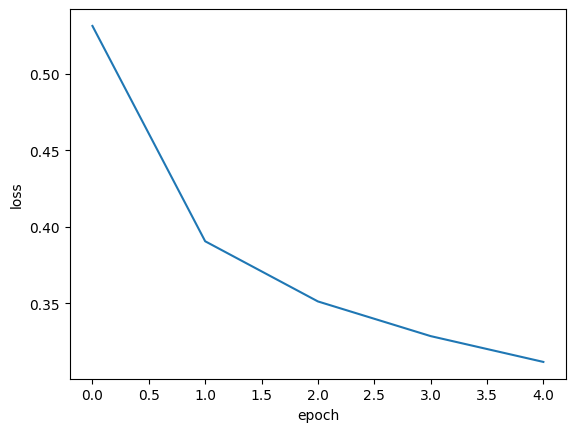

In [10]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능하다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작한다. 5개의 에포크가 0 ~ 4까지 x축에 표현한다.
plt.ylabel('loss')    # 손실된 값
plt.show()

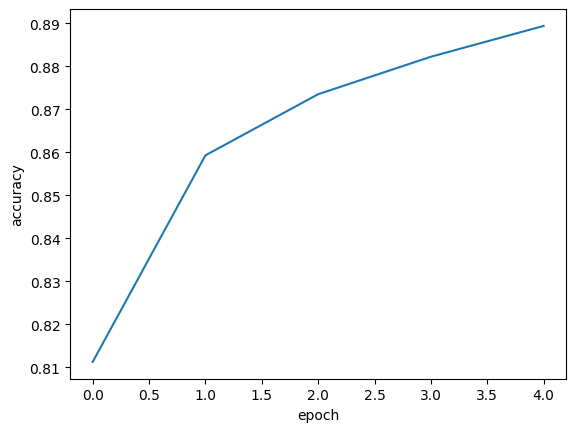

In [11]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상된다.

In [12]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자

model = model_fn()      # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

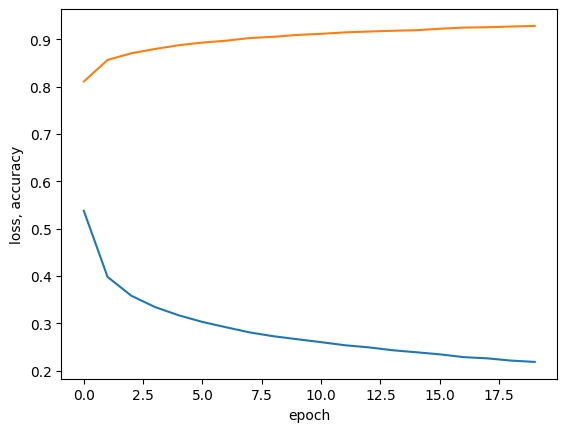

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()
# 손실이 잘 감소됨을 확인 하였지만 약간 조절이 필요하다.

검증손실

*  예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분도 있었다.

*  인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

*  에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요하다.

그래서 위에처럼 훈련세트와 손실과 정확도만 그러면 파악이 어렵다.

검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

keypoint

*  손실을 사용하는 것과 정확도를 사용하는 것의 차이는?

*  인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.

*  손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데 모델이 잘 훈련 되었는지 판단 하려면 정확도보다는 손실 함수의 값을 확인 하는 것이 더 좋은 방법이다.

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [15]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나온다.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


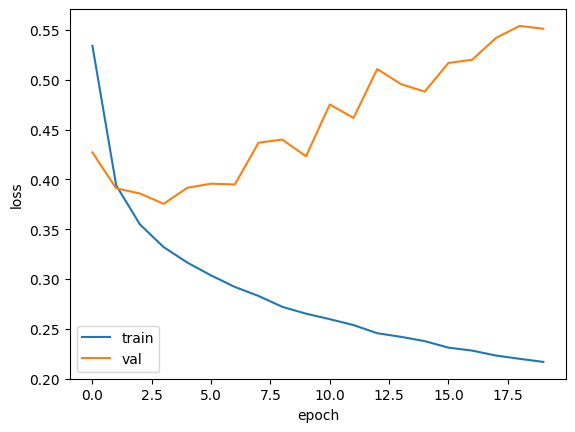

In [16]:
# 과대/ 과소 적합 문제로 조사하기 위해서 훈려손실, 검증 손실을 한 그래프에 그려서 비교해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 마에 다시 상승하였다.

훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어진다.

검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증 세트에 대한 정확도가 증가할 거 같다.

과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드롭아웃) 을 나중에 해보자.

지금은 옵티마이져 하이퍼파라미터를 조절하여 과대 적합을 완화시켜본다

RMSprop 옵티마이져는 많은 문제에서 잘~ 동작합니다. -> 다른 방법으로는 Adam이 있죠

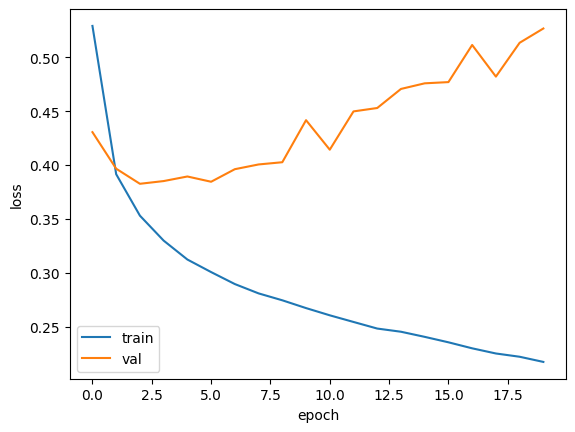

In [17]:
# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과재 적합을 완화 시켜본다.
# RMSprop 옵티마이져는 많은 문제여서 잘 동작합니다 -> 다른 방법으로는 Adam이 있다

model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

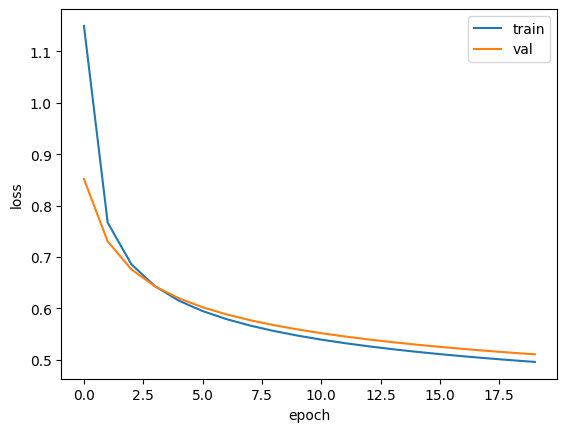

In [18]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()      # Adagrad기법 차트로 보자.
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

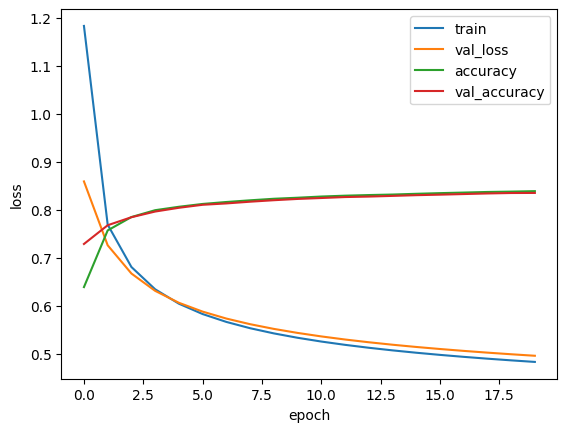

In [19]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()      # Adagrad기법 차트로 보자.
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

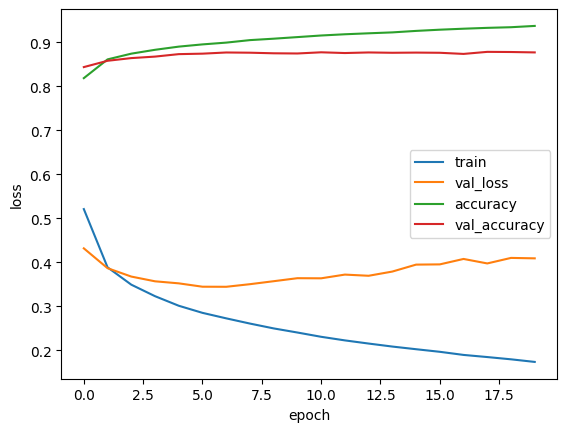

In [20]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

*   드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다,

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서 (뉴런 출력을 0으로 만든다) 과대 적합을 막는다.

*  어떤 샘플을 처리 할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없다.

*  다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h2 출력이 없다.

뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것이다.

드롭 아웃이 왜 과대 젓합을 막을 수 있는지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 한다.

*   일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

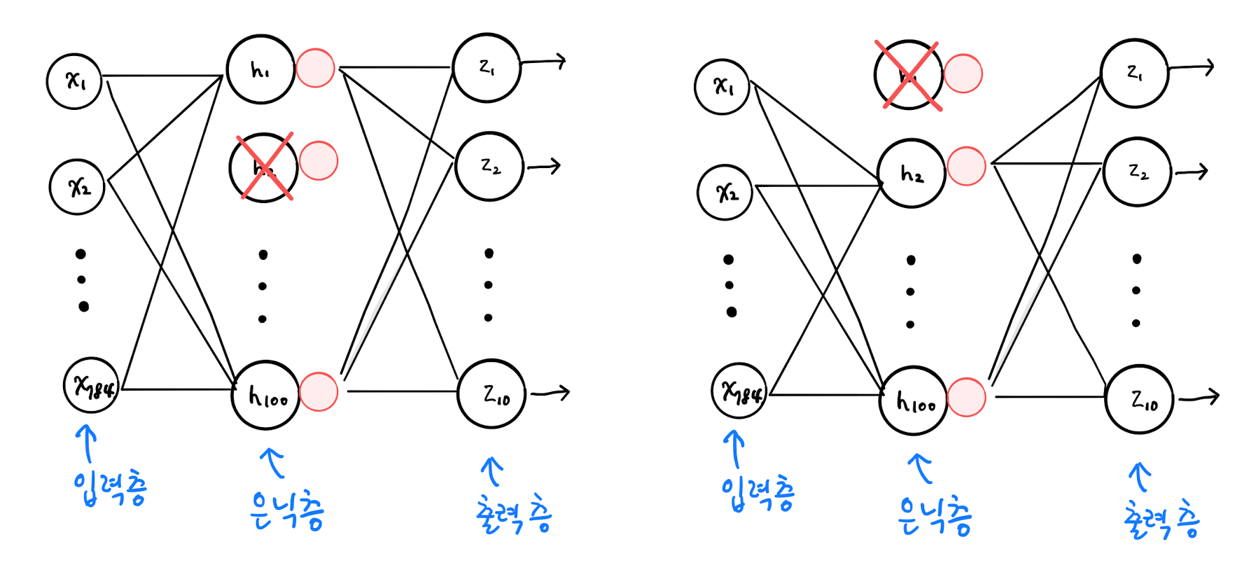

또 다른 분석

*   앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 된다.

앙상블 : 다 좋은 예측을 만들기 위해 여러 개의 모델을 3훈련 하는 머신러닝 알고리즘

*   과대 적합을 막아주는 좋은 기법

*   케라스에서 드롭아웃을 keras, layers.Dropout 로 제공한다.

*   어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다.

*   드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없다.

*   model_fn 함수에 드롭 아웃 객체를 전달하여 층을 추가한다.

In [21]:
model = model_fn(keras.layers.Dropout(0.3))   # 30% 정도 드롭 아웃

model.summary()   # 요약확인
# 은닉층 뒤에 추가된 드롭아웃 층 (3번째 값)은 훈련되는 모델 파라미터가 없다.
# 입력과 출력의 크가가 같다.
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

주의 사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.

훈련된 모든 뉴런을 사용해야 올바른 예측이 수행된다.

텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭이웃을 정용하지 않는다.

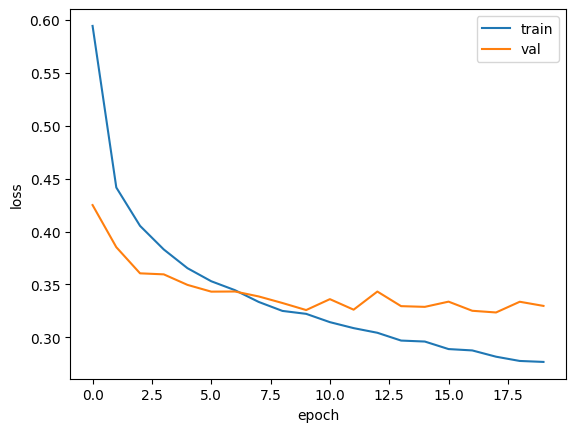

In [22]:
# 훈련 손실과 검증손실의 그래프를 그려보자.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 과대 적합이 확실이 줄어 든다. 10번째  에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보자.


In [25]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model.weights.h5')
# https://www.tensorflow.org/guide/checkpoint?hl=ko
# https://geunuk.tistory.com/466



In [26]:
# 이제는 저장한 모델을 불러와 테스트를 진행해보자
!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 10 06:02 model.weights.h5
-rw-r--r-- 1 root root 974765 Jan 10 06:02 model-whole.keras


In [29]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h3 파일에서 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3))   # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5')  # 이전에 저장했던 파라미터를 로딩
# 이때 사용하는 메서드는 save)_weight()와 쌍을 이루는 load_weight() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야한다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# 모델의 검증 정확도를 확인 해보자.
import numpy as np

# prdeict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
# predict()메서드는 (12,000, 10)크기의 배열을 반환한다.
# 10개의 확률 중 가장 큰 값의 인덱스를 골라 (.argmax) 타킷 레이블과 비교하여 정확도를 계산해보자.
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.
# 예를 들어 아래 그림처럼 5X3 배열에 axis=1로 한값과 axis=0 으로 한 값의 인덱스를 반환한다.
# axgmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이 되고 다르면 0이 된다.
# 이를 평균으로 출력해본다(정확도)
print(np.mean(val_labels == val_target))

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 최대값의 인덱스를 선택한다.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교한다.
# -> 두 배열에서 각 위치의 값이 같으면 1, 다르면 0(평균하면 정확도가 된다.)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8825


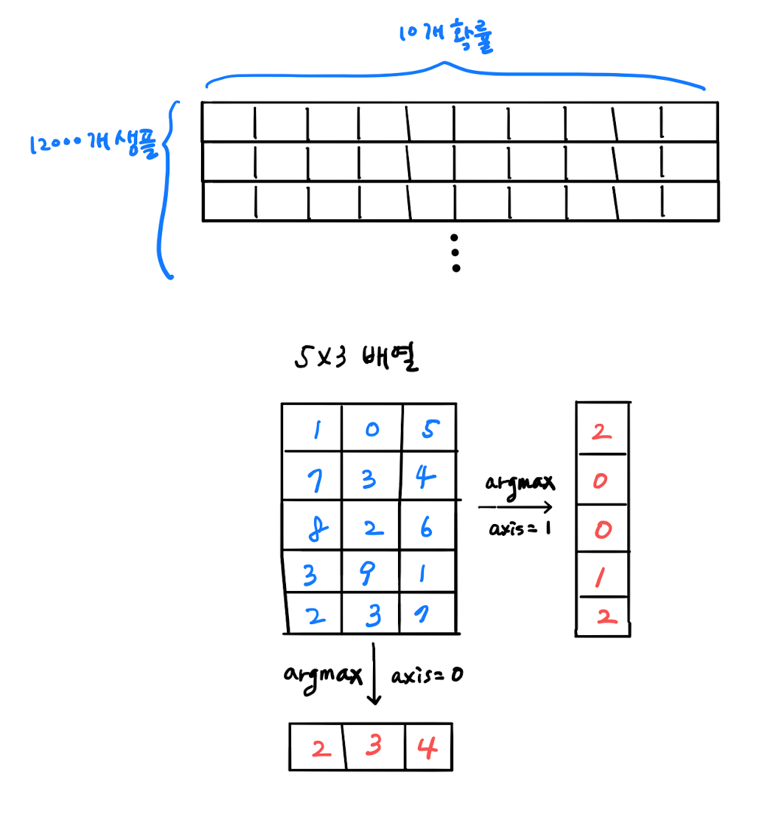


In [34]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해본다.
model = keras.models.load_model('model-whole.keras')    # load_model() 저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target)    # 같은 모델을 불러 들였기 때문에 위와 정확도가 같다.

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련한다.
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자. -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8807 - loss: 0.3246


[0.3257995843887329, 0.8824999928474426]

In [35]:
# 실험 2
# 아에 파일로 새로운 모델을 만들고 바로 사용해 보자/
# 추가적으로 콜백이라는 것을 활용 해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스, 콜백 패키지가 있다.
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용한다/
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장한다.
# sace_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ModelCheckpoint() 콜백은 기본적으로 에포크마다 모델을 저장함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# callbacks=[checkpoint_cb] 콜밸 매개변수에 리스트로 감싸서 전달
# 모델 훈련후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model = keras.models.load_model('best-model.keras')   # load_model 로 저장 했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled, val_target)
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었다.
# 여전히 20번의 에포크 동안 훈련을 한다.
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과재 적합이 더 커지기 때문에 훈려을 게속 할 필요는 없다.
# 이때 훈련을 종료하면 자원과 시간을 아낄수 있다.  -> 조기 종료 (earlt stopping)
# 조기 종료는 딥러닝 분야에 많이 사용하는 기번
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 한다. - > 규제방법중 하나이다.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8861 - loss: 0.3206


[0.3209597170352936, 0.8863333463668823]

In [40]:
# 케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공한가.
# 이 콜백의 patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌린다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승 할때
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)


# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


In [41]:
print(early_stopping_cb.stopped_epoch)
# 조기종료 시점 에포크

16


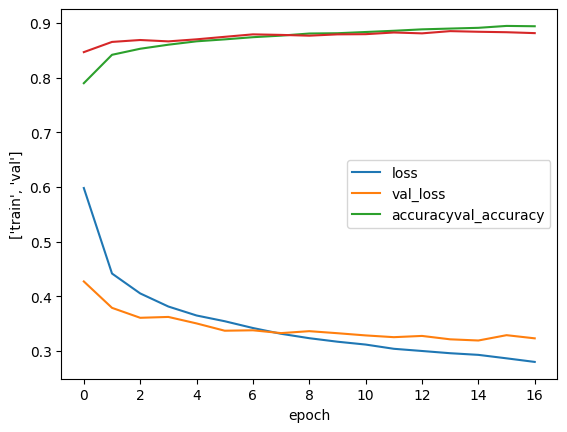

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8820 - loss: 0.3217


[0.3192426860332489, 0.8840833306312561]

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel(['train', 'val'])
plt.legend(['loss', 'val_loss', 'accuracy' 'val_accuracy'])
plt.show()

model.evaluate(val_scaled, val_target)        # 검증세트의 성능확인